In [9]:
#import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
#import dataset
df=pd.read_csv('alldatabowling.csv')
df.head()

,Unnamed: 0,Name,Over,Maidens,Runs_Conceded,Wickets,Dots
0,0,Shakib Al Hasan,96.5,0,769,20,177
1,1,Shivam Mavi,86.1,2,715,25,218
2,2,Lockie Ferguson,79.5,1,648,24,197
3,3,Varun Chakravarthy,123.0,0,839,36,268
4,4,Sunil Narine,258.2,1,1889,58,564


In [11]:
print(df.info())#information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     214 non-null    int64  
 1   Name           214 non-null    object 
 2   Over           214 non-null    float64
 3   Maidens        214 non-null    int64  
 4   Runs_Conceded  214 non-null    int64  
 5   Wickets        214 non-null    int64  
 6   Dots           214 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.8+ KB
None


In [12]:
print(df.describe())#descriptive statistics of dataset

       Unnamed: 0        Over     Maidens  Runs_Conceded     Wickets  \
count  214.000000  214.000000  214.000000     214.000000  214.000000   
mean   106.500000   53.475234    0.387850     441.677570   15.168224   
std     61.920648   64.340241    0.936501     499.615245   19.710575   
min      0.000000    0.100000    0.000000       2.000000    0.000000   
25%     53.250000    7.000000    0.000000      69.500000    1.000000   
50%    106.500000   25.000000    0.000000     221.500000    6.000000   
75%    159.750000   79.875000    0.000000     686.250000   22.750000   
max    213.000000  302.000000    6.000000    2035.000000  104.000000   

             Dots  
count  214.000000  
mean   117.775701  
std    150.756796  
min      0.000000  
25%     11.000000  
50%     48.500000  
75%    176.500000  
max    760.000000  


In [13]:
df.isnull().sum() #total sum of the dataset null values

Unnamed: 0       0
Name             0
Over             0
Maidens          0
Runs_Conceded    0
Wickets          0
Dots             0
dtype: int64

In [14]:
df1=df.drop(columns=["Unnamed: 0"])#Drop unnecessary values
df1

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots
0,Shakib Al Hasan,96.5,0,769,20,177
1,Shivam Mavi,86.1,2,715,25,218
2,Lockie Ferguson,79.5,1,648,24,197
3,Varun Chakravarthy,123.0,0,839,36,268
4,Sunil Narine,258.2,1,1889,58,564
...,...,...,...,...,...,...
209,Rahul Tripathi,1.0,0,12,0,0
210,Ankit Soni,18.1,0,144,2,38
211,Irfan Pathan,2.0,0,26,0,4
212,Marlon Samuels,3.0,0,34,0,5


In [15]:
# Convert Over to integer for better readability
df['Over'] = df['Over'].astype(int)

# Binning Wickets into categories
bins_wickets = [0, 10, 30, df['Wickets'].max()]
labels_wickets = ['Low', 'Medium', 'High']
df['Wicket_Category'] = pd.cut(df['Wickets'], bins=bins_wickets, labels=labels_wickets)
bins_runs = [0, 500, 1000, df['Runs_Conceded'].max()]
labels_runs = ['Economical', 'Moderate', 'Expensive']
df['Run_Category'] = pd.cut(df['Runs_Conceded'], bins=bins_runs, labels=labels_runs)

# Verify changes
df[['Wickets', 'Wicket_Category', 'Runs_Conceded', 'Run_Category']].head()


,Wickets,Wicket_Category,Runs_Conceded,Run_Category
0,20,Medium,769,Moderate
1,25,Medium,715,Moderate
2,24,Medium,648,Moderate
3,36,High,839,Moderate
4,58,High,1889,Expensive


In [16]:
#Visualization of data import white grid to find the visualized data easily
sns.set_style("whitegrid")

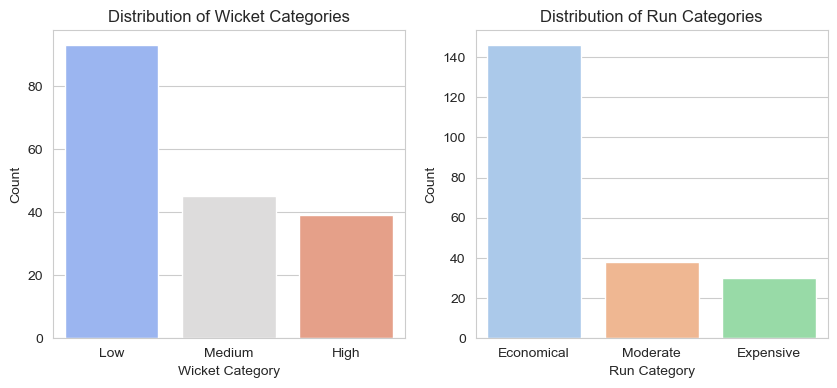

In [17]:
# Bar chart for Wicket Categories
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.countplot(x=df['Wicket_Category'], palette='coolwarm')
plt.title('Distribution of Wicket Categories')
plt.xlabel('Wicket Category')
plt.ylabel('Count')

# Bar chart for Run Categories
plt.subplot(1, 2, 2)
sns.countplot(x=df['Run_Category'], palette='pastel')
plt.title('Distribution of Run Categories')
plt.xlabel('Run Category')
plt.ylabel('Count')
plt.show()

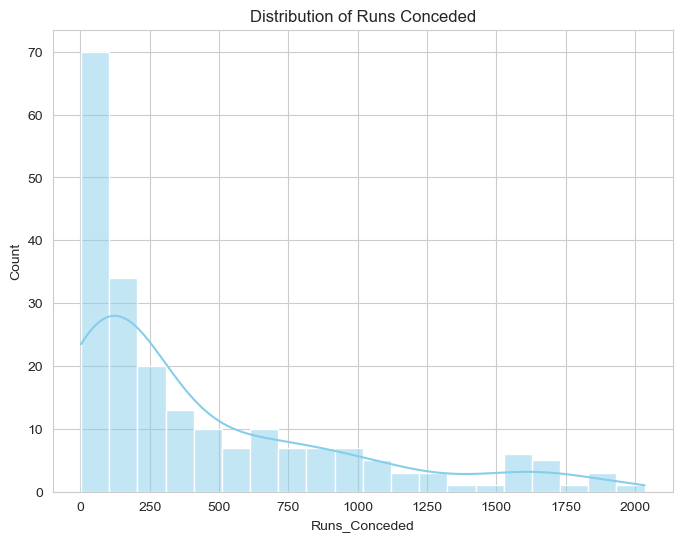

In [18]:
#Histogram Of Runs Conceded
plt.figure(figsize=(8,6))
sns.histplot(df['Runs_Conceded'],bins=20,kde=True,color='skyblue')
plt.title("Distribution of Runs Conceded")
plt.xlabel("Runs_Conceded")
plt.ylabel("Count")
plt.show()

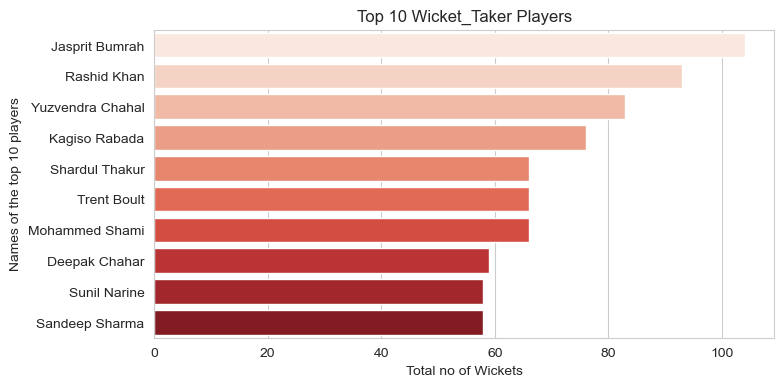

In [19]:
#Bargraph of top 10 players who takes more wickets
plt.figure(figsize=(8,4))
top_players=df.nlargest(10,"Wickets")
sns.barplot(x=top_players["Wickets"],y=top_players["Name"],palette='Reds')
plt.title("Top 10 Wicket_Taker Players")
plt.xlabel("Total no of Wickets")
plt.ylabel("Names of the top 10 players")
plt.show()

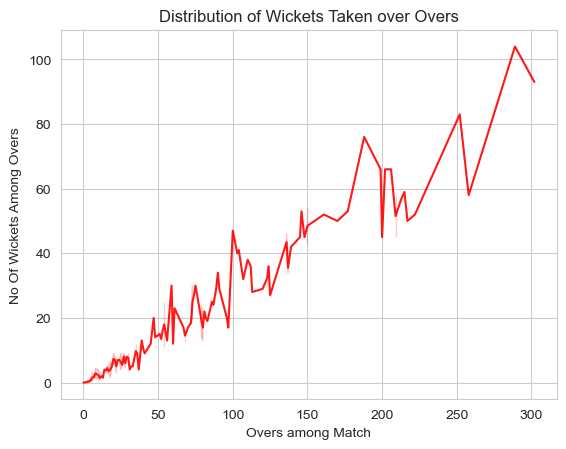

In [20]:
#lineplot of wickets and overs distribution
sns.lineplot(x=df['Over'],y=df['Wickets'],color='red',alpha=0.9)
plt.title("Distribution of Wickets Taken over Overs")
plt.xlabel("Overs among Match")
plt.ylabel("No Of Wickets Among Overs")
plt.show()

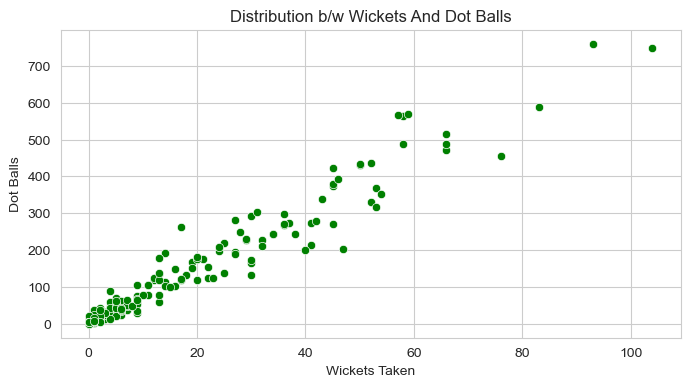

In [22]:
#Correlation between Wickets and Dot balls
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Wickets'],y=df['Dots'],color='green')
plt.title("Distribution b/w Wickets And Dot Balls")
plt.xlabel("Wickets Taken")
plt.ylabel("Dot Balls")
plt.show()

In [27]:
sns.pairplot(df[["Over","Maidens","Runs_Conceded", "Wickets", "Dots"]])
plt.suptitle("Pairplot of Bowling Stats", y=1.02)

Text(0.5, 1.02, 'Pairplot of Bowling Stats')

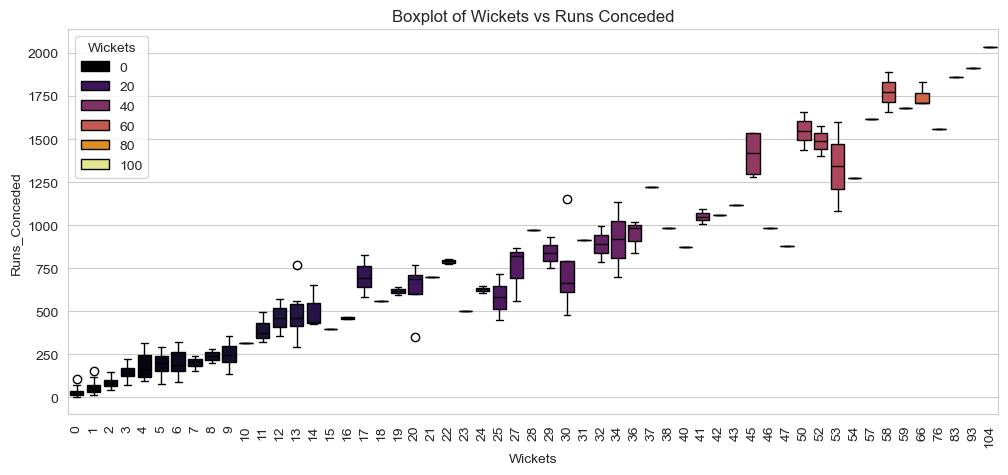

In [26]:
# Boxplot for Runs Conceded and Wickets
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Wickets'], y=df['Runs_Conceded'],palette='inferno',hue=df["Wickets"])
plt.xticks(rotation=90)
plt.title("Boxplot of Wickets vs Runs Conceded")
plt.show()

In [25]:
#Hypothesis testing using ttest between wickets and dot balls
from scipy.stats import ttest_ind

# Split the dataset into two groups based on the median wickets
median_wickets = df['Wickets'].median()
high_wicket_bowlers = df[df['Wickets'] >= median_wickets]['Dots']
low_wicket_bowlers = df[df['Wickets'] < median_wickets]['Dots']

# Perform Independent T-Test
t_stat, p_value_ttest = ttest_ind(high_wicket_bowlers, low_wicket_bowlers, equal_var=False)

# Output the results
print('T-Test Values over Dot Balls:',t_stat)
print('P-value for T test:',p_value_ttest)

T-Test Values over Dot Balls: 12.490433292268545
P-value for T test: 4.3515619883138346e-23


In [28]:
if p_value_ttest<0.05:
    print("Reject the Null Hypothesis:\n High-wicket bowlers tend to deliver more dot balls compared to low-wicket bowlers.")
else:
    print("Failed to reject Null Hypothesis:\nHigh-wicket bowlers tend to deliver less dot balls compared to low-wicket bowlers.")

Reject the Null Hypothesis:
 High-wicket bowlers tend to deliver more dot balls compared to low-wicket bowlers.


In [29]:
#Hypothesis testing using ttest between wickets and Runs_Conceded
from scipy.stats import ttest_ind
# Split the dataset into two groups based on the median wickets
median_wickets = df['Wickets'].median()
high_wicket_bowlers = df[df['Wickets'] >= median_wickets]['Runs_Conceded']
low_wicket_bowlers = df[df['Wickets'] < median_wickets]['Runs_Conceded']

# Perform Independent T-Test
t_stat, p_value_ttest1 = ttest_ind(high_wicket_bowlers, low_wicket_bowlers, equal_var=False)

# Output the results
print('T-Test Values for Runs Conceded:',t_stat)
print('P-value for T test:',p_value_ttest1)

T-Test Values for Runs Conceded: 13.939223167147219
P-value for T test: 1.3832814266068793e-26


In [31]:
if p_value<0.05:
    print("Reject the Null Hypothesis:\n There is a significant difference in the runs conceded between high-wicket and low-wicket bowlers.")
else:
    print("Failed to Reject Null Hypothesis:\n There is no significant difference in the runs conceded between high-wicket and low-wicket bowlers.")
    

Failed to Reject Null Hypothesis:
 There is no significant difference in the runs conceded between high-wicket and low-wicket bowlers.
